This notebook will analyze GSS' Columbia data.

In [14]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv('../data/GSS_Columbia.csv', header=4, index_col=False, thousands=',')
df.columns = ['Year', 'Institution Name', 'Broad Fields', 'Citizenship', 'Count']
df = df.drop('Institution Name', 1) # We know all data describes Columbia
df = df[1:-3] # Drop first row (total of everything) annd last 3 rows (footnotes)
df.head()

,Year,Broad Fields,Citizenship,Count
1,2016,Total for selected values,Total for selected values,6498.0
2,2016,Biological sciences,Total for selected values,790.0
3,2016,Biological sciences,Foreign nationals,235.0
4,2016,Biological sciences,U.S. citizens and permanent residents (non-U.S...,555.0
5,2016,Clinical medicine,Total for selected values,68.0


In [122]:
d = defaultdict(lambda: defaultdict(dict))

for _, row in df.iterrows():
    d[int(row['Year'])][row['Broad Fields']][row['Citizenship']] = row['Count']

In [123]:
DOM_COL = 'U.S. citizens and permanent residents (non-U.S. citizens holding green cards)'
INT_COL = 'Foreign nationals'

In [125]:
def plotField(ax, field):
    domestic = []
    international = []

    years = np.arange(1994, 2017)
    for year in years:
        counts = d[year][field]
        domestic.append(counts.get(DOM_COL, None))
        international.append(counts.get(INT_COL, None))

    ax.plot(years, domestic, label=DOM_COL)
    ax.plot(years, international, label=INT_COL)
    
    ax.set_title(field)
    ax.set(xlabel='Year', ylabel='Count')

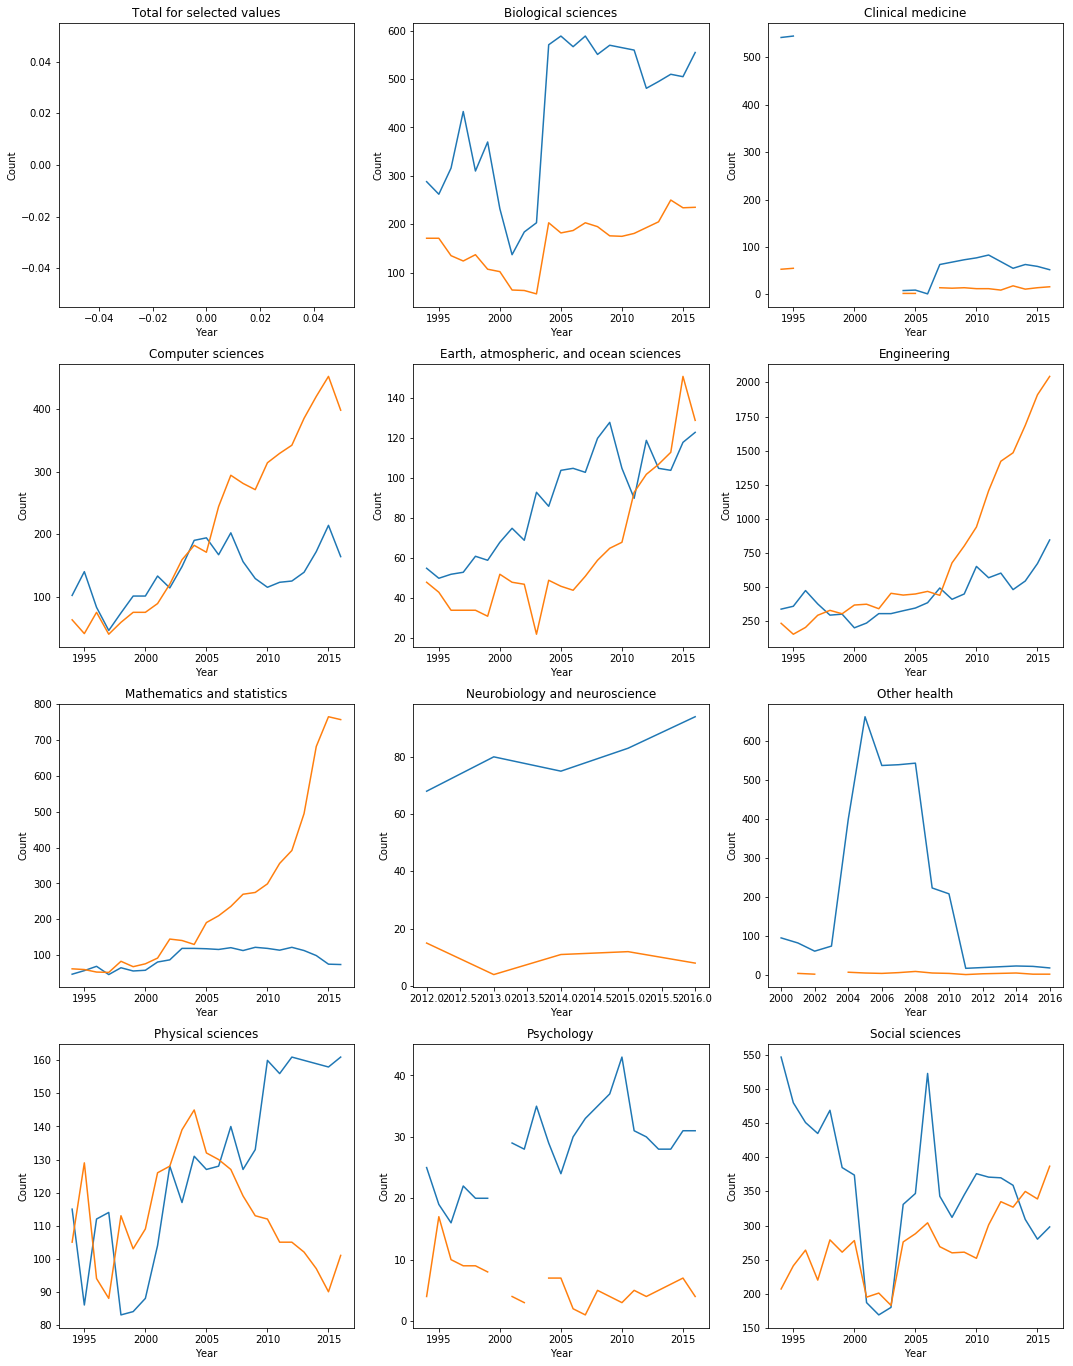

In [127]:
fields = df['Broad Fields'].unique()

cols = 3
rows = int(len(fields) / cols)
_, axarr = plt.subplots(rows, cols, figsize=(18, 24))

for i in range(len(fields)):
    plotField(axarr[ i // cols, i % cols ], fields[i])